In [1]:
!pip install tensorflow
!pip install transformers
!pip install torch
!pip install pydot
!pip install graphviz 

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 105.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 30.9 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 43.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 4.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
import tqdm as tqdm

In [3]:
#!pip uninstall nvidia_cublas_cu11 -y
import torch

In [4]:
#torch.cuda.get_device_name(0)
#torch.cuda.device_count()

2023-03-29 19:23:18.674585: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 19:23:19.732907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
import transformers
import tensorflow as tf
from tensorflow import keras
from transformers import AutoTokenizer, TFAutoModel
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt


# Load LaBSE tokenizer and model
#labse_tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/LaBSE")
#labse_model = TFAutoModel.from_pretrained("sentence-transformers/LaBSE")

#import data
data=pd.read_csv(r'new_data.csv',encoding = 'unicode_escape')

sentence_length=64

#binary encoding for target field
#data.loc[data['complexity']=='simple','complexity']=0
#data.loc[data['complexity']=='complicated','complexity']=1


e1=[]
e3=[]

#Test and traning split
def test_train(dataset,val):

    label_all=np.array(dataset.complexity.values,dtype=np.float16)
    
    df_idx, test_idx = train_test_split(
        np.arange(len(label_all)),
        test_size = val,
        shuffle = True,
        stratify = label_all)
    
    
    d1=dataset.loc[dataset.index.isin(df_idx)]
    d2=dataset.loc[dataset.index.isin(test_idx)]
    
    d1.reset_index(drop=True,inplace=True)
    d2.reset_index(drop=True,inplace=True)
    
    return d1,d2

df,df_test=test_train(data,0.3)

All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at sentence-transformers/LaBSE.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [2]:
import transformers
import tensorflow as tf
from tensorflow import keras
from transformers import AutoTokenizer, TFAutoModel
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

2023-03-23 01:56:10.860112: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
data_cassie = pd.read_csv('Cassie_data_prepared.csv')

In [3]:
data_cassie[data_cassie['iso']=='eng']

Unnamed: 0  iso  complexity  \
0               0  eng           1   
1               1  eng           1   
2               2  eng           1   
3               3  eng           1   
4               4  eng           1   
...           ...  ...         ...   
13166       13166  eng           0   
13167       13167  eng           0   
13168       13168  eng           0   
13169       13169  eng           0   
13170       13170  eng           0   

                                                    text  
0      Karabo Ngidi, a lawyer with the centre, said W...  
1      The age of the big British summer music festiv...  
2      We are symbiotic: the town is here because of ...  
3      We want to make a few photos available to put ...  
4      Inzozi Nziza was opened by the theatre directo...  
...                                                  ...  
13166  Vienna is the worlds best city to live in, Bag...  
13167  To be able to dispose of the bombs safely, you...  
13168  If you had to build a visitor attraction from ...  
13169                 It is a bit like a violent family.  
13170  Food waste is happening in countries where peo...  

[1000 rows x 4 columns]

In [4]:
data_leipzig_news = pd.read_pickle('Leipzig News Corpora')

In [5]:
k = data_leipzig_news.text_standard.value_counts()

k[0:20]

7th and 8th grade      1286532
11th and 12th grade    1272923
9th and 10th grade     1271461
8th and 9th grade      1254626
10th and 11th grade    1136817
5th and 6th grade      1002792
6th and 7th grade       871613
12th and 13th grade     822633
3rd and 4th grade       686903
4th and 5th grade       656390
13th and 14th grade     550303
2nd and 3rd grade       506665
14th and 15th grade     486971
-1th and 0th grade      316492
16th and 17th grade     312552
15th and 16th grade     306261
1st and 2nd grade       302717
17th and 18th grade     204128
18th and 19th grade     171401
0th and 1st grade       153171
Name: text_standard, dtype: int64

In [6]:
data_leipzig_news.loc[data_leipzig_news['text_standard']=='18th and 19th grade','Sentence'].iloc[5]

'Sith also continues in Lucas\' grand tradition of cornball dialogue, particularly in the first hour, which tidies up the "love story" between Anakin and Natalie Portman\'s PadmÃ© Amidala.'

In [7]:
Primary_school_data = pd.DataFrame(data_leipzig_news.loc[data_leipzig_news['text_standard']=='0th and 1st grade','Sentence'])

In [8]:
Primary_school_data['Word Count'] = Primary_school_data['Sentence'].apply(lambda x: len(str(x).split(' ')))

In [9]:
Primary_school_data.loc[(Primary_school_data['Word Count']>=20) & (Primary_school_data['Word Count']<=30),'Sentence'].shape

(1684,)

In [10]:
Primary_school_trimmed = Primary_school_data.loc[(Primary_school_data['Word Count']>=20) & (Primary_school_data['Word Count']<=30),'Sentence']

In [11]:
Primary_school_trimmed = pd.DataFrame(Primary_school_trimmed)
Primary_school_trimmed['iso'] = 'eng'
Primary_school_trimmed['complexity'] = 0

In [12]:
Secondary_school_data = pd.DataFrame(data_leipzig_news.loc[data_leipzig_news['text_standard']=='1st and 2nd grade','Sentence'])

In [13]:
Secondary_school_data['Word Count'] = Secondary_school_data['Sentence'].apply(lambda x: len(str(x).split(' ')))

In [14]:
Secondary_school_data.loc[(Secondary_school_data['Word Count']>=20) & (Secondary_school_data['Word Count']<=30),'Sentence'].shape

(7053,)

In [15]:
Secondary_school_data_trimmed = Secondary_school_data.loc[(Secondary_school_data['Word Count']>=20) & (Secondary_school_data['Word Count']<=30),'Sentence']

In [16]:
Secondary_school_data_trimmed = pd.DataFrame(Secondary_school_data_trimmed)
Secondary_school_data_trimmed['iso'] = 'eng'
Secondary_school_data_trimmed['complexity'] = 0

In [17]:
Secondary_school_data_trimmed.head()

Sentence  iso  complexity
4818   The Standard Poor's 500 index was up 6.80, or ...  eng           0
6177   Registration will be from 7 to 10 a.m. the day...  eng           0
7767   Average rent is seen up 2.5 percent this year ...  eng           0
10001  As a senior in 1984, Doherty was part of a squ...  eng           0
10009  Services will be held at 10 a.m. Wednesday at ...  eng           0

In [18]:
Primary = pd.concat([Primary_school_trimmed,Secondary_school_data_trimmed], axis=0)

In [19]:
Primary.shape

(8737, 3)

In [20]:
University_data = pd.DataFrame(data_leipzig_news.loc[data_leipzig_news['text_standard']=='18th and 19th grade','Sentence'])

In [21]:
University_data['Word Count'] = University_data['Sentence'].apply(lambda x: len(str(x).split(' ')))

In [22]:
University_data.loc[(University_data['Word Count']>=20) & (University_data['Word Count']<=30),'Sentence'].shape

(69368,)

In [23]:
University_data_trimmed = University_data.loc[(University_data['Word Count']>=20) & (University_data['Word Count']<=30),'Sentence']

In [24]:
University_data_trimmed = University_data_trimmed.sample(frac=0.12)

In [25]:
University_data_trimmed = pd.DataFrame(University_data_trimmed)
University_data_trimmed['iso'] = 'eng'
University_data_trimmed['complexity'] = 1

In [26]:
University_data_trimmed.shape

(8324, 3)

In [27]:
english_dataset = pd.concat([Primary,University_data_trimmed], axis=0)

In [28]:
english_dataset = english_dataset.rename(columns = {'Sentence':'text'})

In [29]:
english_dataset.to_csv('English_dataset.csv')

In [30]:
english_dataset = english_dataset[['iso','complexity','text']]

In [31]:
english_dataset.head()

iso  complexity                                               text
2399   eng           0  On May 29, the group will hold a fund-raiser f...
16749  eng           0  I did so at 4.30pm, and was so blown away that...
28094  eng           0  I look back where I came from and I know what ...
28746  eng           0  The TSE's Second Section index gained 23.48 po...
34702  eng           0  The session began around 1 p.m. EDT and wrappe...

In [32]:
english_dataset.shape

(17061, 3)

In [7]:
data_cassie.shape

(25342, 4)

In [8]:
data_cassie = data_cassie[['iso','complexity','text']]

In [34]:
data_4train = pd.concat([data_cassie,english_dataset], axis=0)

In [35]:
data_4train.shape

(42403, 3)

In [100]:
data_4train.to_csv('data_finetuning.csv')

In [96]:
data_4train.reset_index(inplace=True)

In [9]:
#testing validation split with encoding
def train_val(dataset,val):

    dataset=dataset
    val=0.2
        
    labels=np.array(dataset.complexity.values,dtype=np.float16)
    
    if val != 0:
        train_idx, val_idx = train_test_split(
            np.arange(len(labels)),
            test_size = val,
            shuffle = True,
            stratify = labels)
    else:
        train_idx=np.array([*range(len(dataset))])
        val_idx=[]
    
    texts=dataset.text.values
    languages = dataset.iso.values

    t1=texts[train_idx]
    t2=labels[train_idx]
    t5=languages[train_idx]
    
    t3=texts[val_idx]
    t4=labels[val_idx]
    t6 = languages[val_idx]
    
    for i in range(len(t1)):    

        input_ids = labse_tokenizer.encode(t1[i], add_special_tokens=True, return_tensors="tf",padding='max_length',max_length=sentence_length,truncation=True)
        outputs = labse_model(input_ids, output_hidden_states=True)
        sequence_output = outputs.hidden_states[-4:]    # getting last 4 layers
        embedding=np.array([np.array(sequence_output[j])[0] for j in range(len(sequence_output))])
        embedding=embedding.reshape((64,768,4))  #reshaping to fit the convolution layer
        e1.append(embedding)                     
            
    if val != 0:
        
        for i in range(len(t3)):
        
            input_ids = labse_tokenizer.encode(t3[i], add_special_tokens=True, return_tensors="tf",padding='max_length',max_length=64,truncation=True)
            outputs = labse_model(input_ids, output_hidden_states=True)
            sequence_output = outputs.hidden_states[-4:]
            embedding=np.array([np.array(sequence_output[j])[0] for j in range(len(sequence_output))])
            embedding=embedding.reshape((64,768,4))
            e3.append(embedding)
    
    return e1, t2, e3, t4, t5, t6, train_idx,val_idx


In [46]:
train_x,train_y,val_x,val_y=train_val(df,0.2)

train_x=np.array(train_x)
val_x=np.array(val_x)
train_y=np.array(train_y)
val_y=np.array(val_y)

AttributeError: 'DataFrame' object has no attribute 'iso'

In [10]:
cassie_train_x,cassie_train_y,cassie_val_x,cassie_val_y, cassie_train_lang, cassie_val_lang, train_idx,val_idx =train_val(data_cassie,0.2)

cassie_train_x=np.array(cassie_train_x)
cassie_val_x=np.array(cassie_val_x)
cassie_train_y=np.array(cassie_train_y)
cassie_val_y=np.array(cassie_val_y)

NameError: name 'labse_tokenizer' is not defined

In [ ]:
np.save('cassie_train_x.npy',cassie_train_x)
np.save('cassie_val_x.npy',cassie_val_x)
np.save('cassie_train_y.npy',cassie_train_y)
np.save('cassie_val_y.npy',cassie_val_y)

np.save('cassie_train_lang.npy',cassie_train_lang)
np.save('cassie_val_lang.npy',cassie_val_lang)

np.save('train_idx.npy',train_idx)
np.save('val_idx.npy',val_idx)

In [14]:
np.save('train_x.npy',train_x)
np.save('val_x.npy',val_x)
np.save('train_y.npy',train_y)
np.save('val_y.npy',val_y)

In [ ]:
train_x = np.load('train_x.npy')
val_x = np.load('val_x.npy')
train_y = np.load('train_y.npy')
val_y = np.load('val_y.npy')

In [ ]:
cassie_train_x = np.load('cassie_train_x.npy')
cassie_train_y = np.load('cassie_train_y.npy')
train_y = np.load('train_y.npy')
val_y = np.load('val_y.npy')

In [ ]:
train_y.shape

In [201]:
cassie_leizpig_train_x,cassie_leizpig_train_y,cassie_leizpig_val_x,cassie_leizpig_val_y, cassie_leizpig_train_lang, cassie_leizpig_val_lang, train_idx,val_idx =train_val(data_4train,0.2)

cassie_leizpig_train_x=np.array(cassie_leizpig_train_x)
cassie_leizpig_val_x=np.array(cassie_leizpig_val_x)
cassie_leizpig_train_y=np.array(cassie_leizpig_train_y)
cassie_leizpig_val_y=np.array(cassie_leizpig_val_y)

In [202]:
np.save('cassie_leizpig_train_x.npy',cassie_leizpig_train_x)
np.save('cassie_leizpig_val_x.npy',cassie_leizpig_val_x)
np.save('cassie_leizpig_train_y.npy',cassie_leizpig_train_y)
np.save('cassie_leizpig_val_y.npy',cassie_leizpig_val_y)
np.save('cassie_leizpig_train_lang.npy',cassie_leizpig_train_lang)
np.save('cassie_leizpig_val_lang.npy',cassie_leizpig_val_lang)
np.save('train_idx.npy',train_idx)
np.save('val_idx.npy',val_idx)

In [10]:
cassie_leizpig_train_x=np.load('cassie_leizpig_train_x.npy')
cassie_leizpig_val_x=np.load('cassie_leizpig_val_x.npy')
cassie_leizpig_train_y=np.load('cassie_leizpig_train_y.npy')
cassie_leizpig_val_y=np.load('cassie_leizpig_val_y.npy')
cassie_leizpig_train_lang=np.load('cassie_leizpig_train_lang.npy', allow_pickle=True)
cassie_leizpig_val_lang=np.load('cassie_leizpig_val_lang.npy', allow_pickle=True)
train_idx=np.load('train_idx.npy')
val_idx=np.load('val_idx.npy')

In [5]:
cassie_leizpig_val_x=np.load('cassie_leizpig_val_x.npy')

In [6]:
cassie_leizpig_val_x

array([[[[-1.39147621e-02, -1.22951844e-03,  4.25961334e-05,
           4.57717627e-02],
         [-7.26202037e-03, -1.91302598e-02,  3.16539928e-02,
          -4.07423794e-01],
         [-6.04857691e-04, -7.25555234e-04, -5.88037670e-02,
          -8.18635244e-03],
         ...,
         [-2.89706588e-01,  1.16082907e-01,  2.96867967e-01,
           2.60083586e-01],
         [-2.58854814e-02, -1.25629023e-01, -2.47334674e-01,
           2.44038478e-01],
         [ 1.94525868e-01, -8.70032609e-02, -1.56074747e-01,
          -1.48501769e-02]],

        [[-2.06084758e-01, -8.10879245e-02, -1.01641074e-01,
           3.61123204e-01],
         [-2.51038298e-02, -3.95438932e-02,  2.70076275e-01,
           2.00984192e+00],
         [-6.75724596e-02,  5.74038625e-02, -1.04988918e-01,
           6.68910742e-02],
         ...,
         [-3.80783826e-01,  1.39137626e-01,  4.18696463e-01,
           8.91110674e-03],
         [-1.45170957e-01, -3.19241852e-01,  8.27808380e-02,
           4.485565

In [10]:
cassie_leizpig_train_y.shape

(33922,)

In [8]:
cassie_leizpig_train_x.shape

(33922, 64, 768, 4)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense
from keras.optimizers import Adam
from keras.layers import Dropout, LeakyReLU
from keras.regularizers import l2

# reshape the input array to a 5D shape
input_array = np.reshape(cassie_leizpig_train_x, (33922, 64, 768, 4, 1))
labels = cassie_leizpig_train_y

# create an LSTM model with a ConvLSTM20D layer
model = Sequential()
model.add(ConvLSTM2D(64, (3,3), activation='relu', input_shape=(64, 768, 4, 1), padding='same', return_sequences=True))
model.add(Dropout(0.5))
model.add(ConvLSTM2D(32, (3,3), activation='relu', padding='same', return_sequences=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(input_array, labels, epochs=10, batch_size=64)

Epoch 1/10


2023-03-11 23:46:09.058141: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 26677346304 exceeds 10% of free system memory.


531/531 [==============================] - 220s 406ms/step - loss: 0.4266 - accuracy: 0.8262
Epoch 2/10
531/531 [==============================] - 216s 407ms/step - loss: 0.2822 - accuracy: 0.8808
Epoch 3/10
531/531 [==============================] - 216s 407ms/step - loss: 0.2308 - accuracy: 0.9011
Epoch 4/10
531/531 [==============================] - 217s 409ms/step - loss: 0.2024 - accuracy: 0.9112
Epoch 5/10
531/531 [==============================] - 217s 409ms/step - loss: 0.1663 - accuracy: 0.9257
Epoch 6/10
531/531 [==============================] - 217s 409ms/step - loss: 0.1459 - accuracy: 0.9355
Epoch 7/10
531/531 [==============================] - 217s 409ms/step - loss: 0.1286 - accuracy: 0.9427
Epoch 8/10
531/531 [==============================] - 217s 409ms/step - loss: 0.1067 - accuracy: 0.9519
Epoch 9/10
531/531 [==============================] - 217s 409ms/step - loss: 0.0946 - accuracy: 0.9580
Epoch 10/10
531/531 [==============================] - 217s 409ms/step - lo

In [48]:
model.save('Model_96%_acc.h5')

In [5]:
from keras.models import load_model
loaded_model = load_model('Model_96%_acc.h5')

2023-03-29 19:24:36.857394: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [51]:
tf.saved_model.save(model,'Saved_model_96%')

INFO:tensorflow:Assets written to: Saved_model_96%/assets


INFO:tensorflow:Assets written to: Saved_model_96%/assets


In [18]:
# Predict using the model
cassie_leizpig_val_pred = model.predict(cassie_leizpig_val_x)

266/266 [==============================] - 26s 96ms/step


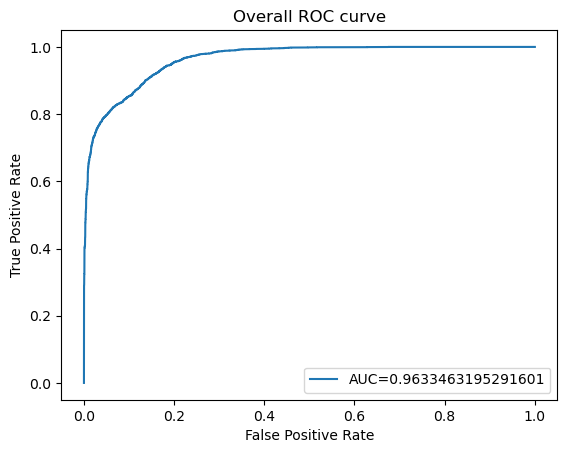

In [19]:
#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y, cassie_leizpig_val_pred)
auc = metrics.roc_auc_score(cassie_leizpig_val_y, cassie_leizpig_val_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Overall ROC curve")
plt.legend(loc=4)
plt.show()

In [9]:
cassie_leizpig_train_lang=np.load('cassie_leizpig_train_lang.npy', allow_pickle=True)
cassie_leizpig_val_lang=np.load('cassie_leizpig_val_lang.npy', allow_pickle=True)

In [23]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='eng':
        language_index.append(index)
    else:
        continue


In [24]:
cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]

In [25]:
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

112/112 [==============================] - 11s 96ms/step


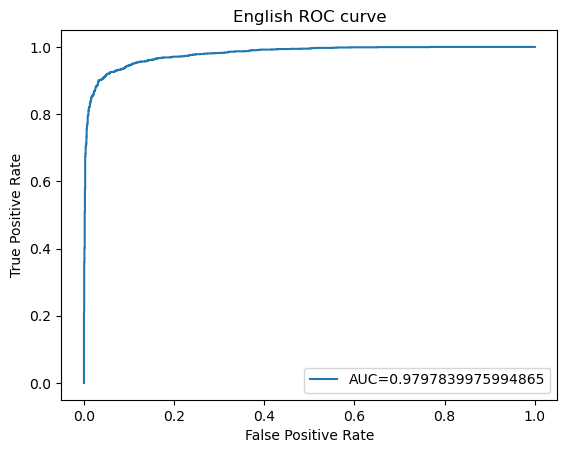

In [248]:
#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("English ROC curve")
plt.legend(loc=4)
plt.show()

1/1 [==============================] - 0s 103ms/step


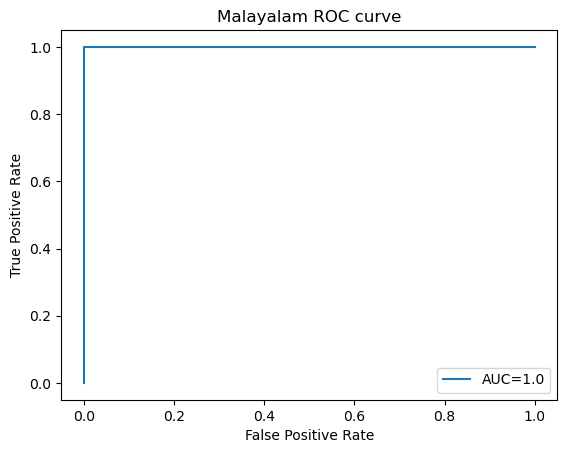

In [27]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='mal':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Malayalam ROC curve")
plt.legend(loc=4)
plt.show()

6/6 [==============================] - 1s 91ms/step


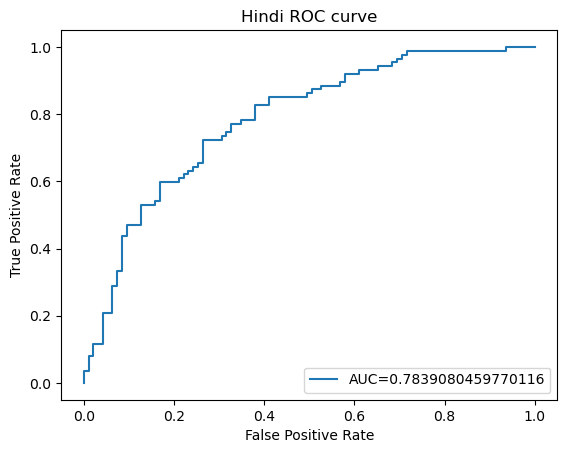

In [29]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='hin':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Hindi ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 91ms/step


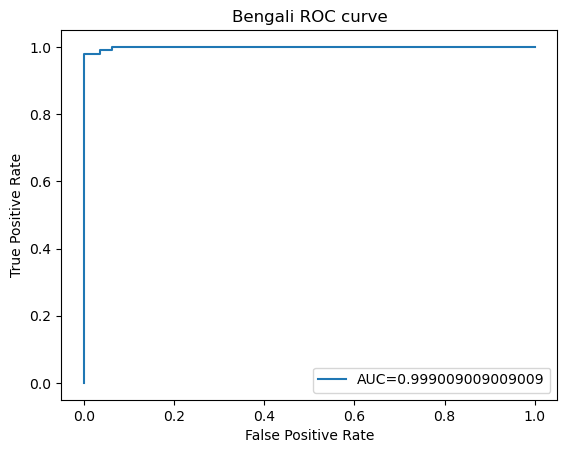

In [30]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='ben':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Bengali ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 84ms/step


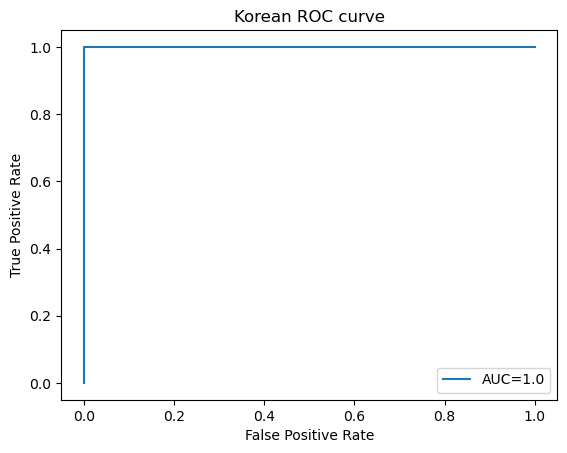

In [31]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='kor':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Korean ROC curve")
plt.legend(loc=4)
plt.show()

2/2 [==============================] - 0s 62ms/step


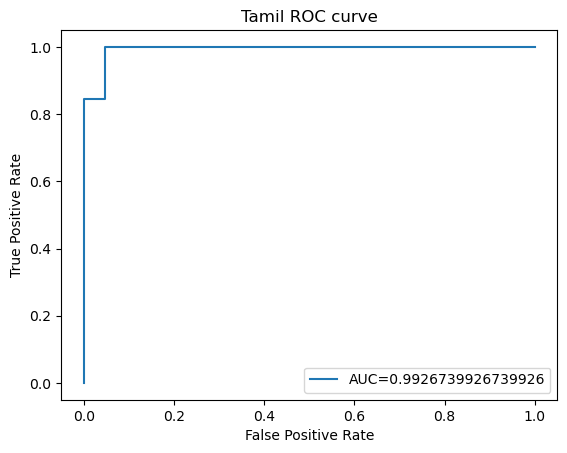

In [32]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='tam':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Tamil ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 91ms/step


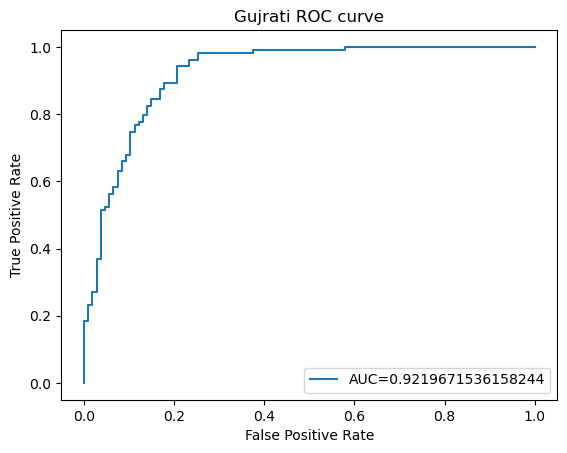

In [33]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='guj':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Gujrati ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 88ms/step


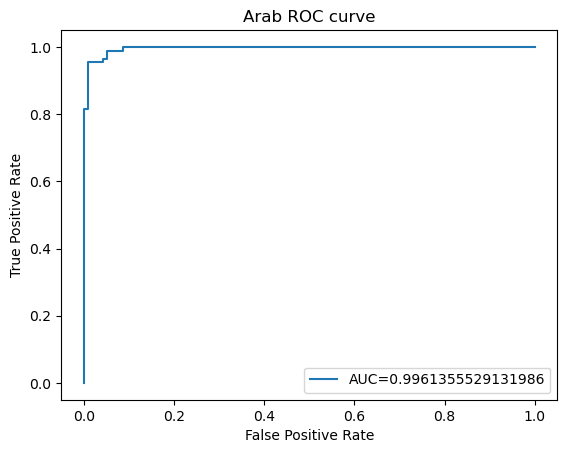

In [34]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='arb':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Arab ROC curve")
plt.legend(loc=4)
plt.show()

6/6 [==============================] - 1s 93ms/step


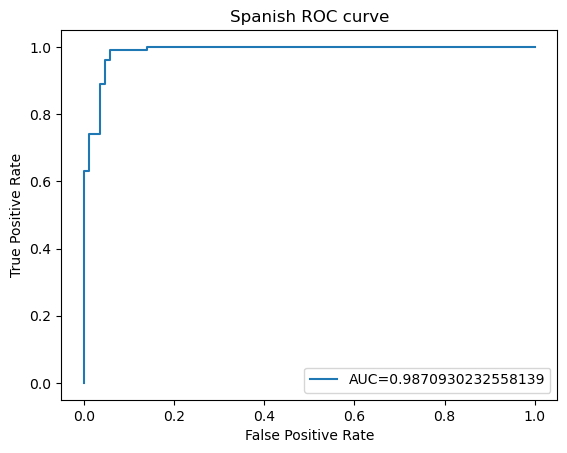

In [35]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='spa':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Spanish ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 90ms/step


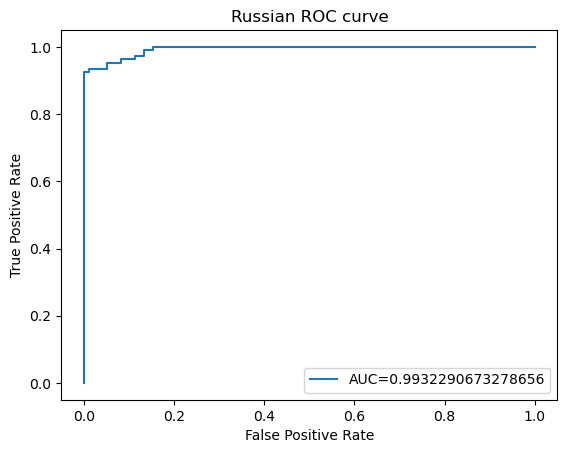

In [36]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='rus':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Russian ROC curve")
plt.legend(loc=4)
plt.show()

8/8 [==============================] - 1s 86ms/step


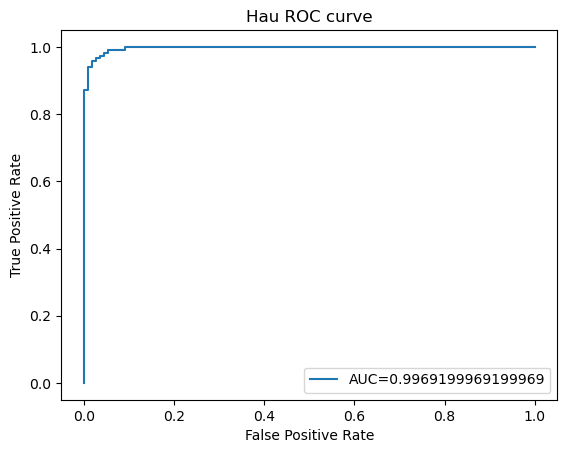

In [37]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='hau':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Hau ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 83ms/step


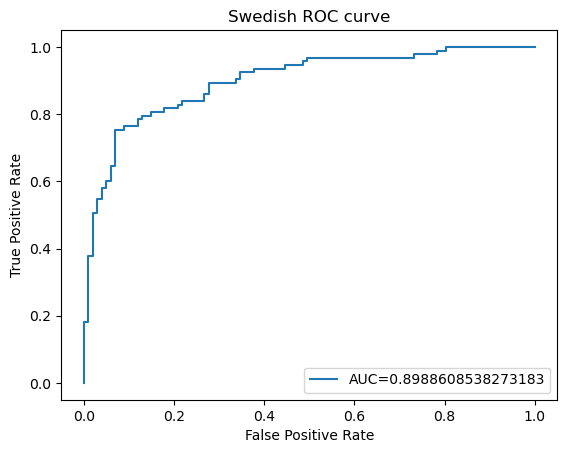

In [38]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='swe':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Swedish ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 86ms/step


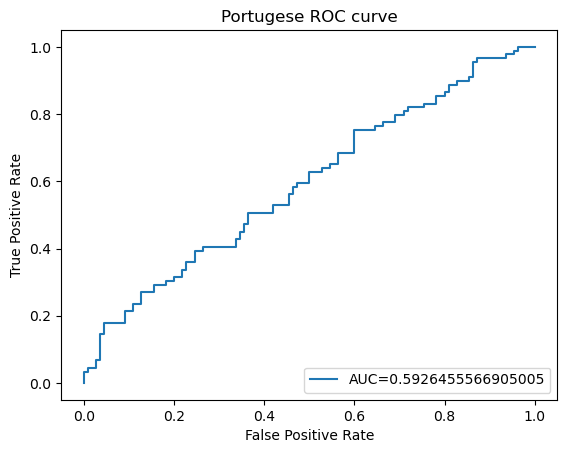

In [39]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='por':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Portugese ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 90ms/step


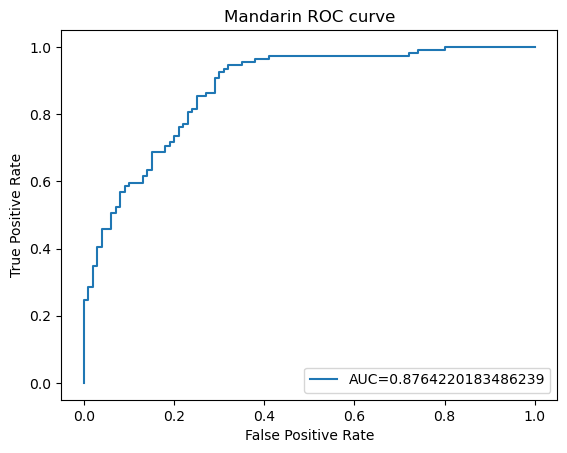

In [40]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='cmn':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Mandarin ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 88ms/step


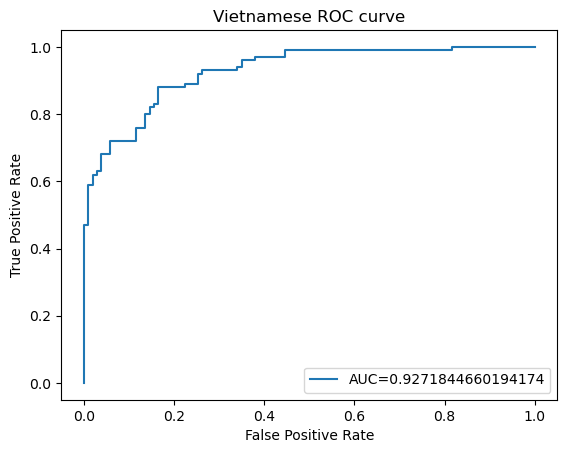

In [41]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='vie':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Vietnamese ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 92ms/step


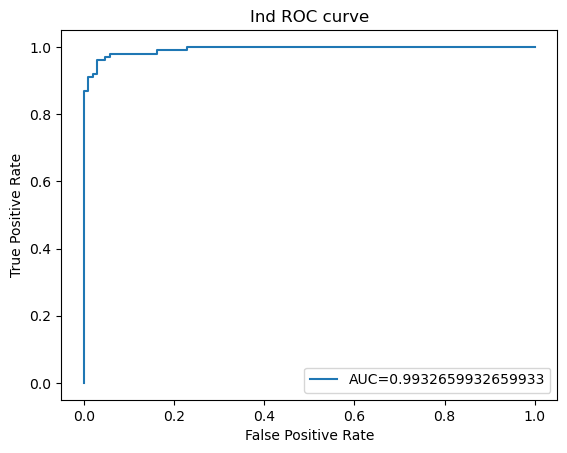

In [42]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='ind':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Ind ROC curve")
plt.legend(loc=4)
plt.show()

6/6 [==============================] - 1s 87ms/step


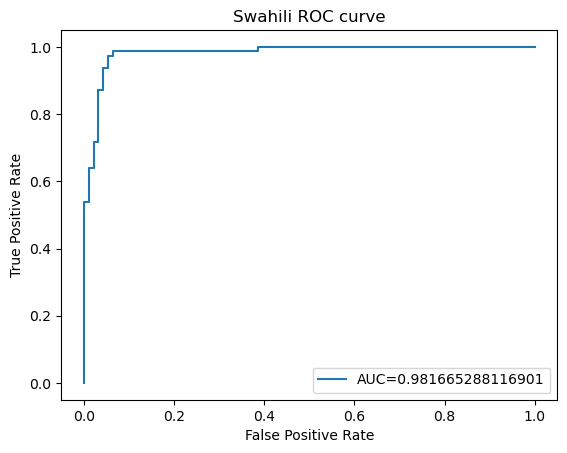

In [43]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='swh':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Swahili ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 90ms/step


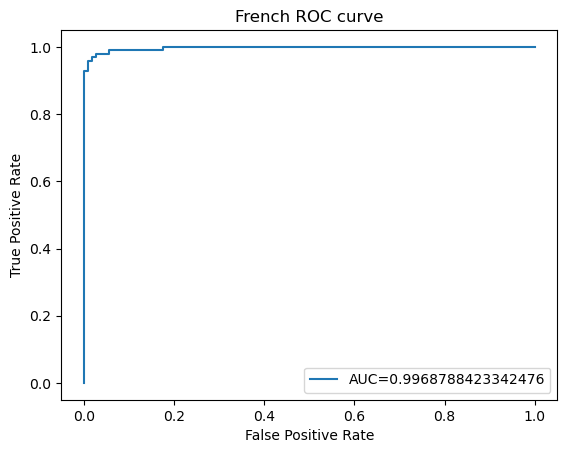

In [44]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='fra':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("French ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 90ms/step


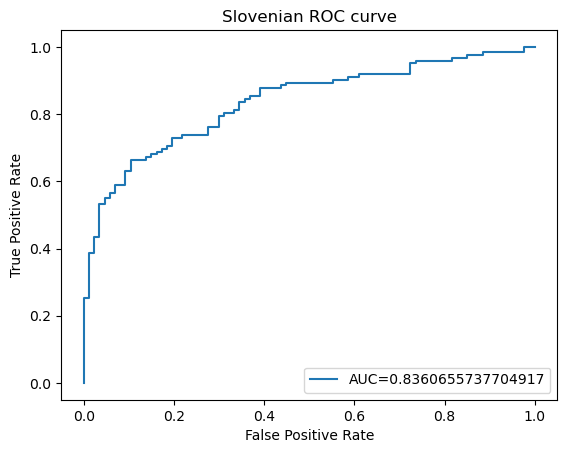

In [45]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='slv':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Slovenian ROC curve")
plt.legend(loc=4)
plt.show()

4/4 [==============================] - 0s 81ms/step


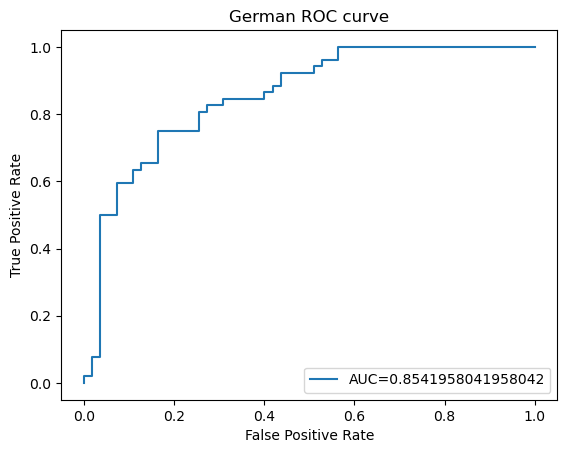

In [46]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='deu':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("German ROC curve")
plt.legend(loc=4)
plt.show()

7/7 [==============================] - 1s 86ms/step


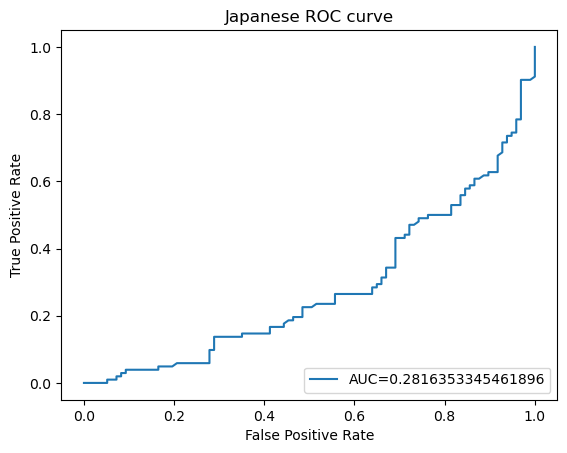

In [47]:
language_index = []
for index, value in enumerate(cassie_leizpig_val_lang):
    if value=='jap':
        language_index.append(index)
    else:
        continue

cassie_leizpig_val_x_lang = cassie_leizpig_val_x[language_index]
cassie_leizpig_val_y_lang = cassie_leizpig_val_y[language_index]
# Predict using the model for sepecific language
cassie_leizpig_val_pred_lang = model.predict(cassie_leizpig_val_x_lang)

#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)
auc = metrics.roc_auc_score(cassie_leizpig_val_y_lang, cassie_leizpig_val_pred_lang)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Japanese ROC curve")
plt.legend(loc=4)
plt.show()

In [52]:
###Uploading the saved model to s3 bucket

In [53]:
import boto3

In [56]:
import boto3
import os

# Create an S3 client
s3 = boto3.client('s3')

# Set the bucket name and directory name
bucket_name = 'purdue-ip-2023-readability'
directory_name = 'Saved_model_96%'

# Iterate over the files in the directory
for subdir, dirs, files in os.walk(directory_name):
    for file in files:
        # Construct the full file path
        file_path = os.path.join(subdir, file)

        # Upload the file to S3
        s3.upload_file(file_path, bucket_name, file_path)

In [4]:
type(loaded_model)

keras.engine.sequential.Sequential

In [5]:
import tarfile
import os
import boto3
import sagemaker
from keras.models import load_model

In [6]:
model_artifact_tar_gz_file = "model_artifact.tar.gz"
bucket = 'purdue-ip-2023-readability'
model_artifact_s3_path = os.path.join("s3://", bucket, "model_artifact.tar.gz")

In [7]:
with tarfile.open(model_artifact_tar_gz_file, "w:gz") as tar:
    tar.add('Model_96%_acc.h5')
    print(tar)

In [23]:
# upload tar.gz file to S3
s3_client = boto3.client("s3")
s3_client.upload_file(model_artifact_tar_gz_file, bucket, model_artifact_s3_path)

In [8]:
model_artifact_s3_path

's3://purdue-ip-2023-readability/model_artifact.tar.gz'

In [9]:
model_artifact_tar_gz_file

'model_artifact.tar.gz'

In [12]:

role= get_execution_role()
print(role)

arn:aws:iam::279795702643:role/service-role/AmazonSageMaker-ExecutionRole-20220819T093712


In [10]:
# Set up a boto3 session
session = boto3.session.Session()
# Set up a SageMaker session using the boto3 session
sagemaker_session = sagemaker.Session(boto_session=session)

In [ ]:
import sagemaker
from sagemaker import get_execution_role,Session
from sagemaker.tensorflow import TensorFlowModel
sagemaker_model = TensorFlowModel(model_data = 's3://purdue-ip-2023-readability/model_artifact.tar.gz',
                                  role = role, framework_version='2.11',
                                  sagemaker_session = sagemaker_session)
predictor = sagemaker_model.deploy(initial_instance_count=1,
                                   instance_type='ml.r5.12xlarge')


update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [27]:
tf.__version__

'2.11.1'

In [37]:
pip install -U sagemaker

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sagemaker: filename=sagemaker-2.140.1-py2.py3-none-any.whl size=925381 sha256=6842f85e8c3863018dcd0110d69a5f265ea1ae8a73319807451294dd0c9c56b1
  Stored in directory: /home/ec2-user/.cache/pip/wheels/07/c7/c3/740c46cd3408fdc0f9439aa5cff410e6ad3e1bc298dcf9f9dd
Successfully built sagemaker
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.132.0
    Uninstalling sagemaker-2.132.0:
      Successfully uninstalled sagemaker-2.132.0
Note: you may need to restart the kernel to use updated packages.


In [14]:
sagemaker.__version__

'2.140.1'

In [16]:
bucket

'purdue-ip-2023-readability'

In [17]:
import tarfile
import gzip

In [ ]:
# Set the paths to your SavedModel directory and any additional assets or code required
saved_model_path = 'path/to/saved_model'
additional_assets_path = 'path/to/additional/assets'

# Create a tarfile object with the name of your tar.gz file
tar_gz_file = tarfile.open('model.tar.gz', mode='w:gz')

# Add the SavedModel directory and any additional assets or code to the tarfile
tar_gz_file.add(saved_model_path, arcname='saved_model')
tar_gz_file.add(additional_assets_path)

# Close the tarfile object
tar_gz_file.close()

In [150]:
##Drawing random sample 

In [151]:
sample_data = data_check.sample(50)

In [154]:
sample_data.to_csv('sample.csv')

In [ ]:
## Data check

In [12]:
data_check = pd.read_csv('data_finetuning.csv')

In [13]:
cassie_leizpig_train_x=np.load('cassie_leizpig_train_x.npy')
cassie_leizpig_val_x=np.load('cassie_leizpig_val_x.npy')
cassie_leizpig_train_y=np.load('cassie_leizpig_train_y.npy')
cassie_leizpig_val_y=np.load('cassie_leizpig_val_y.npy')
cassie_leizpig_train_lang=np.load('cassie_leizpig_train_lang.npy', allow_pickle=True)
cassie_leizpig_val_lang=np.load('cassie_leizpig_val_lang.npy', allow_pickle=True)
train_idx=np.load('train_idx.npy')
val_idx=np.load('val_idx.npy')

In [14]:
cassie_leizpig_train_x.shape

(33922, 64, 768, 4)

In [15]:
train_idx.shape

(33922,)

In [52]:
pd.set_option('display.max_rows', None)

In [ ]:
data_check

In [50]:
data_check.iso.value_counts()

eng    18061
ndl     1000
cak     1000
ind     1000
ben     1000
spa     1000
fra     1000
kor     1000
tpi     1000
hau     1000
rus     1000
swe     1000
por     1000
vie     1000
arb     1000
cmn     1000
tha     1000
npi     1000
hin     1000
guj     1000
jap     1000
urd     1000
slv     1000
swh      870
ita      610
deu      500
tam      224
mal      124
amh       14
Name: iso, dtype: int64

In [57]:
data_cassie[data_cassie['iso']=='eng'].shape

(1000, 4)

In [143]:
data_check[(data_check['complexity']==1) & (data_check['iso']=='eng')]

Unnamed: 0     index  iso  complexity  \
0               0         0  eng           1   
1               1         1  eng           1   
2               2         2  eng           1   
3               3         3  eng           1   
4               4         4  eng           1   
5               5         5  eng           1   
6               6         6  eng           1   
7               7         7  eng           1   
8               8         8  eng           1   
9               9         9  eng           1   
10             10        10  eng           1   
11             11        11  eng           1   
12             12        12  eng           1   
13             13        13  eng           1   
14             14        14  eng           1   
15             15        15  eng           1   
16             16        16  eng           1   
17             17        17  eng           1   
18             18        18  eng           1   
19             19        19  eng           1   
20             20        20  eng           1   
21             21        21  eng           1   
22             22        22  eng           1   
23             23        23  eng           1   
24             24        24  eng           1   
25             25        25  eng           1   
26             26        26  eng           1   
27             27        27  eng           1   
28             28        28  eng           1   
29             29        29  eng           1   
30             30        30  eng           1   
31             31        31  eng           1   
32             32        32  eng           1   
33             33        33  eng           1   
34             34        34  eng           1   
35             35        35  eng           1   
36             36        36  eng           1   
37             37        37  eng           1   
38             38        38  eng           1   
39             39        39  eng           1   
40             40        40  eng           1   
41             41        41  eng           1   
42             42        42  eng           1   
43             43        43  eng           1   
44             44        44  eng           1   
45             45        45  eng           1   
46             46        46  eng           1   
47             47        47  eng           1   
48             48        48  eng           1   
49             49        49  eng           1   
50             50        50  eng           1   
51             51        51  eng           1   
52             52        52  eng           1   
53             53        53  eng           1   
54             54        54  eng           1   
55             55        55  eng           1   
56             56        56  eng           1   
57             57        57  eng           1   
58             58        58  eng           1   
59             59        59  eng           1   
60             60        60  eng           1   
61             61        61  eng           1   
62             62        62  eng           1   
63             63        63  eng           1   
64             64        64  eng           1   
65             65        65  eng           1   
66             66        66  eng           1   
67             67        67  eng           1   
68             68        68  eng           1   
69             69        69  eng           1   
70             70        70  eng           1   
71             71        71  eng           1   
72             72        72  eng           1   
73             73        73  eng           1   
74             74        74  eng           1   
75             75        75  eng           1   
76             76        76  eng           1   
77             77        77  eng           1   
78             78        78  eng           1   
79             79        79  eng           1   
80             80        80  eng           1   
81             81        81  eng           1   
82             82      

In [117]:
eng_comp = data_check[(data_check['complexity']==1) & (data_check['iso']=='eng')].index

In [118]:
eng_simp = data_check[(data_check['complexity']==0) & (data_check['iso']=='eng')].index

In [ ]:
data_check['complexity']

In [47]:
data_cassie.shape

(25342, 4)

In [49]:
data_cassie.complexity.value_counts()

1    12671
0    12671
Name: complexity, dtype: int64

In [ ]:
data_cassie

In [72]:
train_idx

array([35876, 12413, 21146, ...,  6010,  3519, 27908])

In [71]:
train_idx[6010]

1

In [149]:
for index, value in enumerate(train_idx):
    if value==3:
        print(index)
    else:
        continue

18492


In [119]:
index_eng_simple = []
for index, value in enumerate(train_idx):
    if value in eng_simp:
        index_eng_simple.append(index)
    else:
        continue

In [121]:
index_eng_complex = []
for index, value in enumerate(train_idx):
    if value in eng_comp:
        index_eng_complex.append(index)
    else:
        continue

In [122]:
cassie_leizpig_train_y[index_eng_simple]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float16)

In [123]:
cassie_leizpig_train_y[index_eng_complex]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float16)

In [82]:
cassie_leizpig_train_x.shape

(33922, 64, 768, 4)

In [89]:
#cassie_leizpig_train_x[3471]

In [124]:
cassie_train_x_check_complex = []
for i in index_eng_complex:
    cassie_train_x_check_complex.append(cassie_leizpig_train_x[i])

In [132]:
np.save('check_complex.npy',cassie_train_x_check_complex)
check_complex = np.load('check_complex.npy')

In [130]:
cassie_train_x_check_simple = []
for i in index_eng_complex:
    cassie_train_x_check_simple.append(cassie_leizpig_train_x[i])

In [133]:
np.save('check_simple.npy',cassie_train_x_check_simple)
check_simple = np.load('check_simple.npy')

In [84]:
cassie_train_x_check.append(cassie_leizpig_train_x[3471])

In [81]:
cassie_leizpig_train_x[3471].shape

(64, 768, 4)

In [66]:
from keras.models import load_model
loaded_model = load_model('Model_96%_acc.h5')

In [134]:
# Predict using the model
cassie_leizpig_check_complex = loaded_model.predict(check_complex)
cassie_leizpig_check_simple = loaded_model.predict(check_simple)

221/221 [==============================] - 20s 92ms/step


In [140]:
cassie_leizpig_check_complex = pd.DataFrame(cassie_leizpig_check_complex)
cassie_leizpig_check_simple = pd.DataFrame(cassie_leizpig_check_simple)

In [142]:
cassie_leizpig_check_complex.to_csv('complex_check.csv')
cassie_leizpig_check_simple.to_csv('simple_check.csv')

In [110]:
cassie_leizpig_check

array([[0.00015094],
       [0.00011488]], dtype=float32)

In [58]:
data_leipzig_news = pd.read_pickle('Leipzig News Corpora')